In [1]:
import pickle

with open('file.pickle', 'rb') as handle:
    all_named_parameters = pickle.load(handle)

In [2]:
# Code to be used
import pandas as pd

df = pd.DataFrame({
    'embeddings': [key for key in all_named_parameters for data in all_named_parameters[key]],
    'words' : [data[1] for key in all_named_parameters for data in all_named_parameters[key]] , 
    'weights' : [data[0] for key in all_named_parameters for data in all_named_parameters[key]] 
})

In [3]:
df.head(100)

,embeddings,words,weights
0,FASTTEXT_CRAWL_SUB_300,go,"[[-0.9792241, -1.255539, 0.4999838, -0.2246754..."
1,FASTTEXT_CRAWL_SUB_300,urban center,"[[-1.6407427, 0.46013045, -0.46081272, -0.3056..."
2,FASTTEXT_CRAWL_SUB_300,travel,"[[0.42157504, -1.9707144, 0.68760437, 1.120631..."
3,FASTTEXT_CRAWL_SUB_300,take,"[[2.096792, 0.12092285, -0.5395852, 1.6151183,..."
4,FASTTEXT_CRAWL_SUB_300,work,"[[2.0395167, -0.97711, -0.60482264, 1.573002, ..."
...,...,...,...
95,GLOVE_TWITTER_27B_25D_25,take,"[[0.27386585, 0.30176702, -0.09677359, 0.27986..."
96,GLOVE_TWITTER_27B_25D_25,mortal,"[[-0.3102125, 0.3429326, -0.44449064, -0.63999..."
97,GLOVE_TWITTER_27B_25D_25,POS_TAG_VERB,"[[-0.19698009, 0.62698483, 0.1840317, 0.038940..."
98,GLOVE_TWITTER_27B_25D_25,pass,"[[0.07627872, 0.15456587, -0.1653982, -0.23932..."


In [4]:
len(df.loc[df['embeddings'] == 'FASTTEXT_CRAWL_SUB_300']['weights'][0][0])

300

In [5]:
# Code to be used
import numpy as np


df_m = df.groupby(
    ["embeddings", "words"]
    )["weights"].apply(
        list).apply(
            lambda x: np.concatenate(
                x, axis=0))

In [6]:
df_m = df_m.unstack(level=0)

In [7]:
df_m

embeddings,FASTTEXT_CRAWL_SUB_300,FASTTEXT_CRAWL_VEC_300D_300,FASTTEXT_WIKI_SUB_300D_300,FASTTEXT_WIKI_VEC_300D_300,GLOVE_42B_300D_300,GLOVE_6B_100D_100,GLOVE_6B_200D_200,GLOVE_6B_300D_300,GLOVE_6B_50D_50,GLOVE_840B_300D_300,GLOVE_TWITTER_27B_100D_100,GLOVE_TWITTER_27B_200D_200,GLOVE_TWITTER_27B_25D_25,GLOVE_TWITTER_27B_50D_50,WORD2VEC_GOOGLE_NEWS_300D_300
words,,,,,,,,,,,,,,,
POS_TAG_NOUN,"[[2.1188085, 2.4669435, -1.0777347, 1.5903169,...","[[0.174527, 0.40500036, -0.23256078, -0.367563...","[[-0.22095454, -2.382643, 4.3991833, -1.053210...","[[-0.21131957, -2.3697064, 4.4240994, -1.04951...","[[-0.16942586, 0.34185112, 0.3788185, 0.208373...","[[0.03855244, 0.22650777, 0.053713843, -0.3961...","[[0.1710601, 0.114948034, 0.09759552, -0.01966...","[[0.32753775, -0.23457466, 0.17248556, 0.05207...","[[0.07456244, 0.25960463, -0.12432036, 0.01400...","[[-0.1711421, 0.31254506, 0.47444972, -0.61936...","[[-0.18002456, -0.102510236, -0.109875575, 0.0...","[[-0.12606458, -0.15989305, -0.18404049, -0.07...","[[0.19949144, -0.3154592, -0.17231837, 0.34264...","[[0.20100622, -0.55920833, -0.35371423, 0.4276...","[[0.52008253, 1.1046664, -0.80386204, -0.61328..."
POS_TAG_PROPN,"[[-2.7103918, -0.9921096, -0.46762303, 0.71294...","[[-0.2694515, 0.29333946, 0.30825832, 0.396653...","[[0.83893174, -1.612208, -0.09238234, 2.388811...","[[0.82765234, -1.6095572, -0.125945, 2.3470247...","[[0.51050234, -0.35024157, 0.32652625, 0.02523...","[[-0.027703237, -0.013698097, 0.03344237, -0.1...","[[-0.09651742, 0.097782046, -0.33515126, -0.03...","[[-0.47691575, 0.043321796, 0.07488163, -0.139...","[[0.0032718242, 0.06560182, -0.08955721, 0.419...","[[0.08343072, -0.33113846, 0.09262863, 0.51979...","[[0.025380064, 0.10824959, 0.14812562, -0.1060...","[[0.17570193, 0.29060936, 0.08634566, 0.017510...","[[-0.04970423, -0.16536103, 0.11391088, -0.215...","[[-0.012931929, -0.024019595, 0.0043306956, -0...","[[0.16393192, -0.7327335, 0.41720575, 0.011949..."
POS_TAG_VERB,"[[0.28024763, -2.0134234, 1.5693069, -2.374389...","[[0.54849887, -0.33100504, 0.21024577, -0.3416...","[[-2.1333604, 5.431779, -7.8730955, -3.3649464...","[[-2.149199, 5.4571567, -7.8960238, -3.3550544...","[[-0.946493, 0.33794144, -0.5142612, -0.361111...","[[0.3189844, -0.2807069, 0.038706735, 0.720301...","[[-0.31799582, 0.02218355, 0.18458034, -0.2164...","[[0.23357368, 0.19665378, -0.48338193, -0.4431...","[[0.021585971, -0.114158414, 0.4706811, -0.523...","[[-0.6067336, 0.28787175, -0.64222705, -0.6254...","[[0.023186, 0.0071890596, -0.08908659, -0.2918...","[[-0.28625116, 0.01756432, 0.0939254, -0.32963...","[[-0.19698009, 0.62698483, 0.1840317, 0.038940...","[[-0.35405657, 0.49748567, 0.3675858, 0.012128...","[[-1.231415, 0.32237336, -0.20180209, -0.17753..."
act,"[[-0.84937733, -1.0016992, -0.23704112, 1.5485...","[[-0.4114295, -1.2233219, 0.15542486, 2.007564...","[[-4.485369, -0.5545635, -0.7198338, 0.9257283...","[[-4.4638724, -0.6070255, -0.6936159, 0.937081...","[[-0.3751166, -0.70953256, 0.26072326, 0.60752...","[[0.55092794, -0.7575283, -0.43074304, -0.2302...","[[0.3257917, -0.059442848, -0.24988008, -0.739...","[[0.11068564, 0.53753996, 0.39866823, -0.51369...","[[0.42325577, -0.41207328, -0.43374926, -0.347...","[[-1.0419014, -0.6245734, 0.06652565, 0.009578...","[[0.2703285, 0.7456794, 0.15116334, -0.1171528...","[[0.040528484, 0.4321688, 0.20822915, -0.03917...","[[0.23783702, 0.48869967, -0.63341475, -0.3124...","[[0.17451334, 0.39959624, -0.066338025, -0.132...","[[0.9773054, -0.37091744, 0.22703299, -0.17144..."
activity,"[[2.8280115, 0.76041204, -0.973099, -3.777559,...","[[-0.8972082, -0.71560884, -0.021396473, 2.274...","[[2.822825, -3.5102305, -2.3977191, -2.2694964...","[[2.8339193, -3.4920354, -2.4167144, -2.233331...","[[-0.59004915, 0.60719323, 0.2762885, -0.59219...","[[0.1834406, -0.4787602, -0.44547018, -0.26370...","[[-0.5718688, 0.6979982, 0.37652576, -0.370131...","[[0.4673903, -0.17959721, 0.43481845, -0.32802...","[[0.460663, 0.030155618, -0.43

In [8]:
#Generalize to all columns and use
words = [index for index, value in df_m['FASTTEXT_CRAWL_SUB_300'].items()]
weights = [value for index, value in df_m['FASTTEXT_CRAWL_SUB_300'].items()] #for number in value[0]
weights = np.concatenate(weights)

In [9]:
words[0], weights[0]

('POS_TAG_NOUN',
 array([ 2.1188085e+00,  2.4669435e+00, -1.0777347e+00,  1.5903169e+00,
         3.7548554e-01,  1.3996960e+00,  8.5006636e-01, -4.7617633e-02,
         6.9020659e-01,  9.2039061e-01,  5.6002241e-01,  1.8619158e+00,
         6.8863904e-01, -1.0120218e+00,  1.3049658e-01,  2.6574180e-01,
        -3.8229263e-01, -1.8875805e+00, -2.6080518e+00,  2.2453244e+00,
         5.0252038e-01,  5.7006204e-01, -4.2760354e-01, -8.4650117e-01,
         2.2391845e-01,  1.4841460e-01, -2.1805067e+00, -9.6660328e-01,
        -3.9981604e-01, -1.3284346e-01,  2.1383693e-02,  1.3001150e+00,
        -1.5830864e+00,  1.6421119e+00,  1.3455207e+00,  1.7060261e+00,
        -1.2054539e+00, -2.4625902e+00, -1.9466226e+00,  6.2645584e-01,
         2.0126150e+00, -1.1042151e+00,  1.6263342e-02,  1.3800185e+00,
        -8.2876253e-01, -6.8111068e-01, -1.8070464e+00, -1.3608370e+00,
         6.6511083e-01,  7.8092134e-01,  4.5456091e-01,  2.6457763e-01,
         4.8008105e-01, -8.2682975e-02,  4.3393

In [10]:
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np

In [11]:
import matplotlib.pyplot as plt

In [12]:
# df_m.loc['utter']['FASTTEXT_CRAWL_SUB_300']
len(words)

46

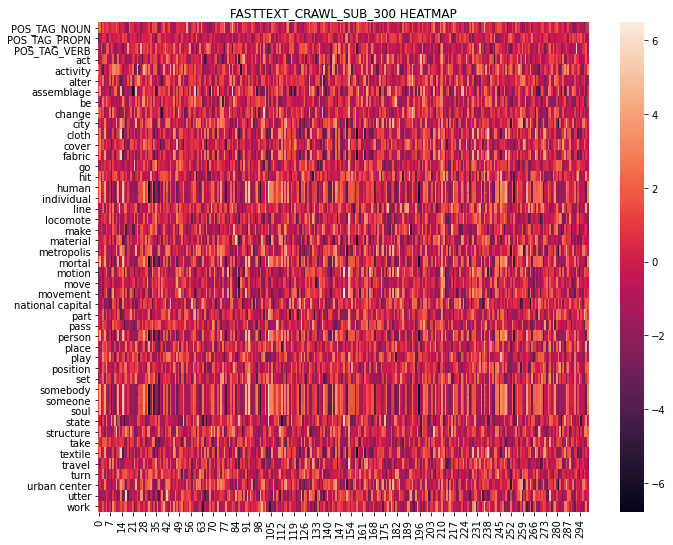

In [17]:
# use code
fig, ax = plt.subplots(figsize=(11, 9))
sb.heatmap(weights, yticklabels=words)
ax.set_title("FASTTEXT_CRAWL_SUB_300 HEATMAP")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/matrix.py:649: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


Text(0.5, 0.98, 'FASTTEXT_CRAWL_SUB_300 DENDOGRAM')

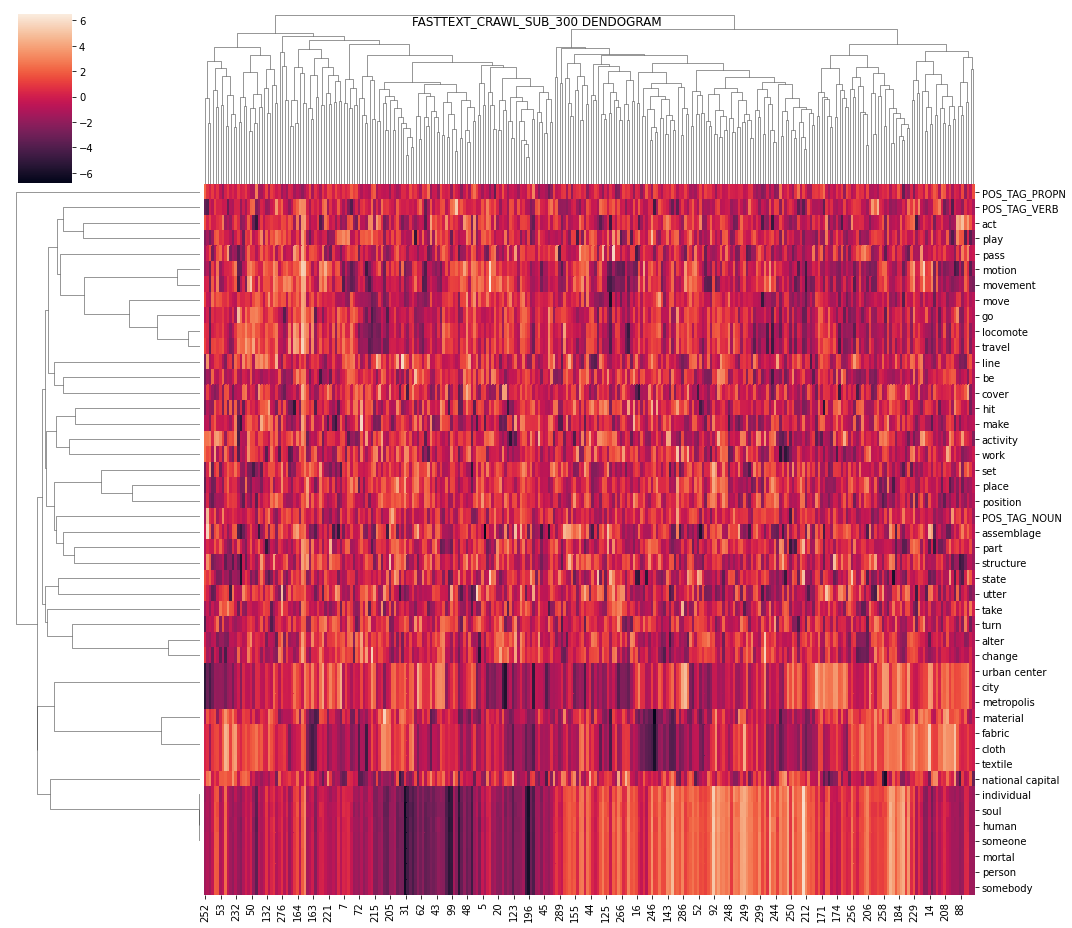

In [21]:
# use code 
plot = sb.clustermap(
    weights, metric="correlation", 
    yticklabels=words, 
    figsize=(15, 13))
plot.fig.suptitle("FASTTEXT_CRAWL_SUB_300 DENDOGRAM")